Now an example of training from scratch and choosing the features from a csv file to choose, we will be training it and using fuel consum;tion per city to predict co2 emission , we will be plotting out its linearirty and step by step do it :

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


matplotlib.pyplot as plt helps us to plot our datafeatures against each other, bear in mind this is a simple linear regression,pandas to import our csv,pylab to mass import numpy and panda ,numpy for random generation :


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")


now we'll describe the datatset,view it and then shorten it to work with selected features :

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [17]:
sdf=df[['FUELCONSUMPTION_CITY','CO2EMISSIONS','ENGINESIZE','CYLINDERS']]
sdf.head(3)

,FUELCONSUMPTION_CITY,CO2EMISSIONS,ENGINESIZE,CYLINDERS
0,9.9,196,2.0,4
1,11.2,221,2.4,4
2,6.0,136,1.5,4


Now we'll work with this dataset, we'll plot a histogram,plot it as a scatter graph,check for linearaity and then we'll use a train test split , 75%train adn 25% test :

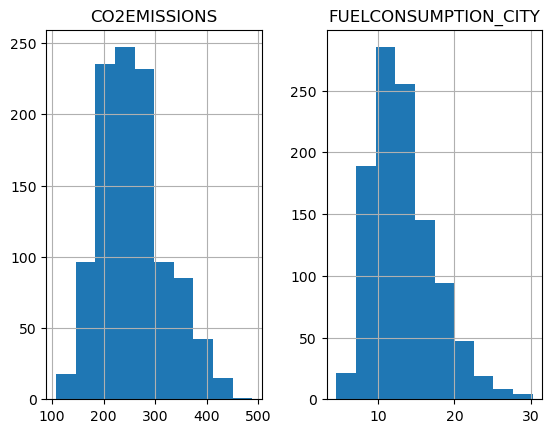

In [6]:
viz = sdf[['CO2EMISSIONS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

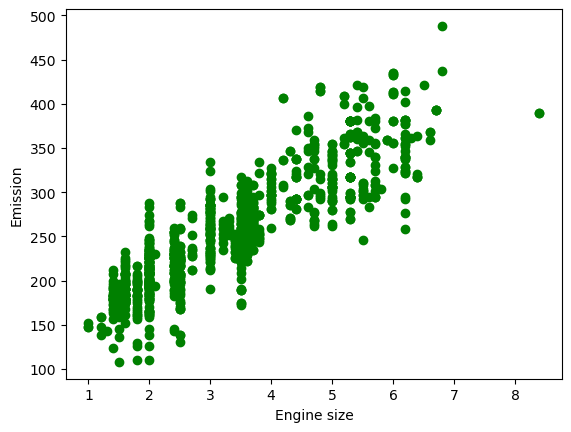

In [20]:
plt.scatter(sdf.ENGINESIZE, sdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

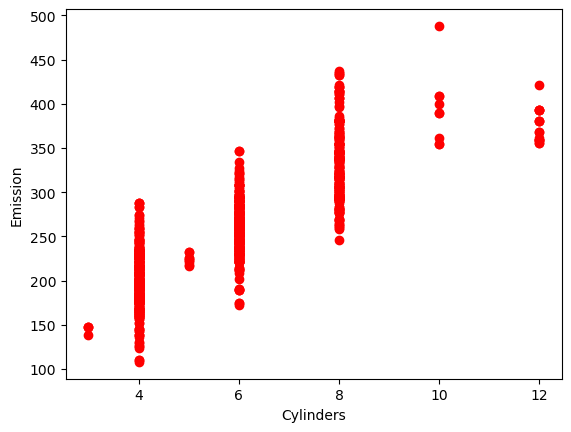

In [23]:
plt.scatter(sdf.CYLINDERS,sdf.CO2EMISSIONS,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

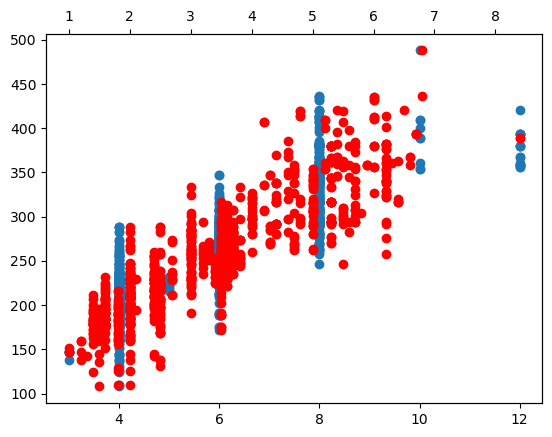

In [24]:
fig, ax = plt.subplots()
ay = ax.twiny()

ax.scatter(sdf.CYLINDERS, sdf.CO2EMISSIONS)
ay.scatter(sdf.ENGINESIZE, sdf.CO2EMISSIONS, color='r')
plt.show()

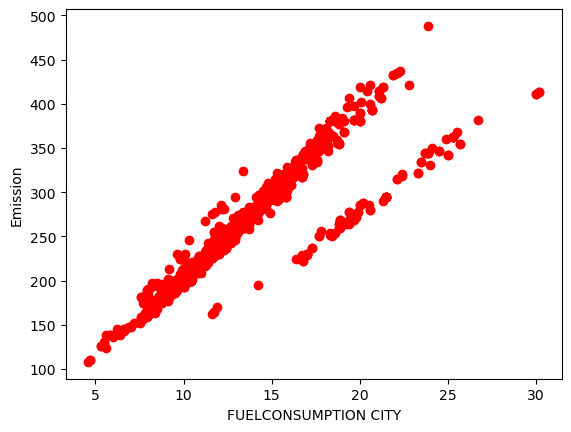

In [7]:
plt.scatter(sdf.FUELCONSUMPTION_CITY, sdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION CITY")
plt.ylabel("Emission")
plt.show()

In [8]:
set1 = np.random.rand(len(sdf)) < 0.8
train = sdf[set1]
test = sdf[~set1]

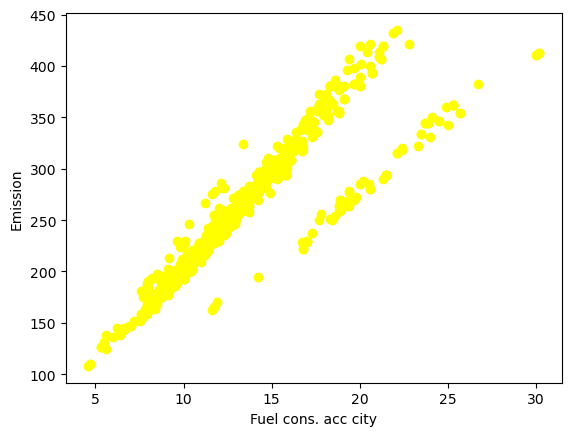

In [9]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='yellow')
plt.xlabel("Fuel cons. acc city")
plt.ylabel("Emission")
plt.show()

Now that we've checked for linearity / plotted, and divided the set into a train test split, we will now be importing the linear model to make the linear regression model using sklearn and train the x and y  according to hyte respected fit line we want , for eg :

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[13.791555]]
Intercept:  [72.82240145]


We need coefficients to calculate the fitline, they're the parameters for it

Text(0, 0.5, 'Emission')

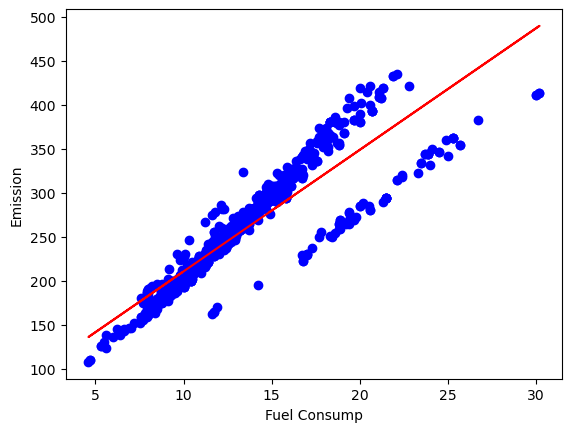

In [11]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consump")
plt.ylabel("Emission")

Now. since we've trained the model and obtained a fitline we'll write a code to predict the co2 emission via a single value , we will be having to reshape it since it takes array values and ours is a single scalar value

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
varval =  np.array([12.1])
varval = np.reshape(varval,(1,-1))
testa=regr.predict(varval)
print(testa)


[[239.700217]]


In [16]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.09
Residual sum of squares (MSE): 829.01
R2-score: 0.80
